# Randomness

**Co-author**

> - [Philip Solimine, *UBC*](https://www.psolimine.net)  



**Prerequisites**

- [Introduction to Numpy](https://datascience.quantecon.org/numpy_arrays.html)  
- [Applied Linear Algebra](https://datascience.quantecon.org/applied_linalg.html)  


**Outcomes**

- Recall basic probability  
- Draw random numbers from numpy  
- Understand why simulation is useful  
- Understand the basics of Markov chains and using the `quantecon` library to study them  
- Simulate discrete and continuous random variables and processes  

In [ ]:
# Uncomment following line to install on colab
#! pip install 

## Randomness

We will use the `numpy.random` package to simulate randomness in Python.

This lecture will present various probability distributions and then use
numpy.random to numerically verify some of the facts associated with them.

We import `numpy` as usual

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Probability

Before we learn how to use Python to generate randomness, we should make sure
that we all agree on some basic concepts of probability.

To think about the probability of some event occurring, we must understand what possible
events could occur – mathematicians refer to this as the *event space*.

Some examples are

- For a coin flip, the coin could either come up heads, tails, or land on its side.  
- The inches of rain falling in a certain location on a given day could be any real
  number between 0 and $ \infty $.  
- The change in an S&P500 stock price could be any real number between
  $ - $ opening price and $ \infty $.  
- An individual’s employment status tomorrow could either be employed or unemployed.  
- And the list goes on…  


Notice that in some of these cases, the event space can be counted (coin flip and employment status)
while in others, the event space cannot be counted (rain and stock prices).

We refer to random variables with countable event spaces as *discrete random variables* and
random variables with uncountable event spaces as *continuous random variables*.

We then call certain numbers ‘probabilities’ and associate them with events from the event space.

The following is true about probabilities.

1. The probability of any event must be greater than or equal to 0.  
1. The probability of all events from the event space must sum (or integrate) to 1.  
1. If two events cannot occur at same time, then the probability that at least one of them occurs is
  the sum of the probabilities that each event occurs (known as independence).  


We won’t rely on these for much of what we learn in this class, but occasionally, these facts will
help us reason through what is happening.

### Simulating Randomness in Python

One of the most basic random numbers is a variable that has equal probability of being any value
between 0 and 1.

You may have previously learned about this probability distribution as the Uniform(0, 1).

Let’s dive into generating some random numbers.

Run the code below multiple times and see what numbers you get.

In [4]:
np.random.rand()

0.8411248374651207

We can also generate arrays of random numbers.

In [5]:
np.random.rand(25)

array([0.25578566, 0.71810984, 0.20612734, 0.99450474, 0.65389419,
       0.73985187, 0.22957771, 0.91719062, 0.00333076, 0.65463011,
       0.45550729, 0.50503281, 0.05073104, 0.10441328, 0.69580735,
       0.79566143, 0.82604673, 0.99516666, 0.67218316, 0.24969579,
       0.8309375 , 0.11715401, 0.77527895, 0.33461001, 0.24751737])

In [6]:
np.random.rand(5, 5)

array([[0.00319466, 0.28509591, 0.22077974, 0.53323971, 0.98133066],
       [0.90275564, 0.58762444, 0.02618184, 0.56972694, 0.30833005],
       [0.16012969, 0.60906571, 0.57540864, 0.84120225, 0.17961244],
       [0.56416504, 0.94610614, 0.98742895, 0.29928021, 0.04731274],
       [0.00492515, 0.20221611, 0.9050473 , 0.96723112, 0.49956472]])

In [7]:
np.random.rand(2, 3, 4)

array([[[0.95224473, 0.97473155, 0.26514057, 0.51873199],
        [0.17411122, 0.41424124, 0.85103846, 0.6023118 ],
        [0.32412298, 0.41508954, 0.44831251, 0.77113915]],

       [[0.82235482, 0.97895995, 0.66593409, 0.69288679],
        [0.08282111, 0.40555021, 0.13064288, 0.88371821],
        [0.64693498, 0.4304098 , 0.68756961, 0.0800526 ]]])

### Why Do We Need Randomness?

As economists and data scientists, we study complex systems.

These systems have inherent randomness, but they do not readily reveal their underlying distribution
to us.

In cases where we face this difficulty, we turn to a set of tools known as Monte Carlo
methods.

These methods effectively boil down to repeatedly simulating some event (or events) and looking at
the outcome distribution.

This tool is used to inform decisions in search and rescue missions, election predictions, sports,
and even by the Federal Reserve.

The reasons that Monte Carlo methods work is a mathematical theorem known as the *Law of Large
Numbers*.

The Law of Large Numbers basically says that under relatively general conditions, the distribution of simulated outcomes will mimic the true distribution as the number of simulated events goes to infinity.

We already know how the uniform distribution looks, so let’s demonstrate the Law of Large Numbers by approximating the uniform distribution.

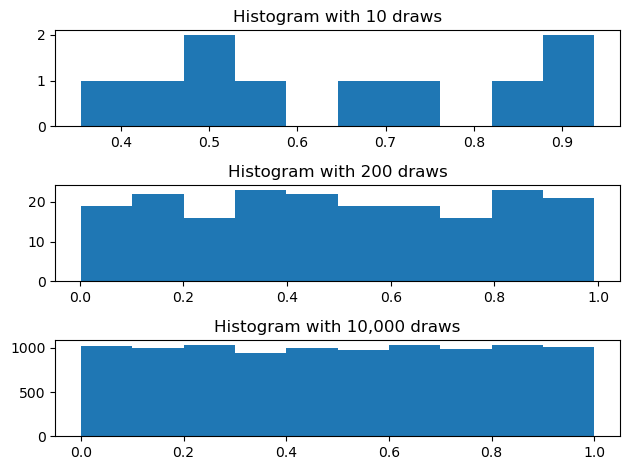

In [8]:
# Draw various numbers of uniform[0, 1] random variables
draws_10 = np.random.rand(10)
draws_200 = np.random.rand(200)
draws_10000 = np.random.rand(10_000)

# Plot their histograms
fig, ax = plt.subplots(3)

ax[0].set_title("Histogram with 10 draws")
ax[0].hist(draws_10)

ax[1].set_title("Histogram with 200 draws")
ax[1].hist(draws_200)

ax[2].set_title("Histogram with 10,000 draws")
ax[2].hist(draws_10000)

fig.tight_layout()

### Exercise

See exercise 1 in the [exercise list](#ex3-4).

### Discrete Distributions

Sometimes we will encounter variables that can only take one of a
few possible values.

We refer to this type of random variable as a discrete distribution.

For example, consider a small business loan company.

Imagine that the company’s loan requires a repayment of $ \\$25,000 $ and must be repaid 1 year
after the loan was made.

The company discounts the future at 5%.

Additionally, the loans made are repaid in full with 75% probability, while
$ \\$12,500 $ of loans is repaid with probability 20%, and no repayment with 5%
probability.

How much would the small business loan company be willing to loan if they’d like to
– on average – break even?

In this case, we can compute this by hand:

The amount repaid, on average, is: $ 0.75(25,000) + 0.2(12,500) + 0.05(0) = 21,250 $.

Since we’ll receive that amount in one year, we have to discount it:
$ \frac{1}{1+0.05} 21,250 \approx 20238 $.

We can now verify by simulating the outcomes of many loans.

In [9]:
# You'll see why we call it `_slow` soon :)
def simulate_loan_repayments_slow(N, r=0.05, repayment_full=25_000.0,
                                  repayment_part=12_500.0):
    repayment_sims = np.zeros(N)
    for i in range(N):
        x = np.random.rand()  # Draw a random number

        # Full repayment 75% of time
        if x < 0.75:
            repaid = repayment_full
        elif x < 0.95:
            repaid = repayment_part
        else:
            repaid = 0.0

        repayment_sims[i] = (1 / (1 + r)) * repaid

    return repayment_sims

print(np.mean(simulate_loan_repayments_slow(25_000)))

20279.523809523806


#### Aside: Vectorized Computations

The code above illustrates the concepts we were discussing but is much slower than
necessary.

Below is a version of our function that uses numpy arrays to perform computations
instead of only storing the values.

In [10]:
def simulate_loan_repayments(N, r=0.05, repayment_full=25_000.0,
                             repayment_part=12_500.0):
    """
    Simulate present value of N loans given values for discount rate and
    repayment values
    """
    random_numbers = np.random.rand(N)

    # start as 0 -- no repayment
    repayment_sims = np.zeros(N)

    # adjust for full and partial repayment
    partial = random_numbers <= 0.20
    repayment_sims[partial] = repayment_part

    full = ~partial & (random_numbers <= 0.95)
    repayment_sims[full] = repayment_full

    repayment_sims = (1 / (1 + r)) * repayment_sims

    return repayment_sims

np.mean(simulate_loan_repayments(25_000))

20247.142857142855

We’ll quickly demonstrate the time difference in running both function versions.

In [11]:
%timeit simulate_loan_repayments_slow(250_000)

137 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit simulate_loan_repayments(250_000)

4.07 ms ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The timings for my computer were 167 ms for `simulate_loan_repayments_slow` and 5.05 ms for
`simulate_loan_repayments`.

This function is simple enough that both times are acceptable, but the 33x time difference could
matter in a more complicated operation.

This illustrates a concept called *vectorization*, which is when computations
operate on an entire array at a time.

In general, numpy code that is *vectorized* will perform better than numpy code that operates on one
element at a time.

For more information see the
[QuantEcon lecture on performance Python](https://python-programming.quantecon.org/numba.html) code.

### Aside: Using Class to Hold Parameters

We have been using objects and classes both internal to python (e.g. `list`) from external libraries (e.g. `numpy.array`). Sometimes it is convenient to create your own classes to organize parameter, data, and functions.

In this section we will reimplement our function using new classes to hold parameters.

First, we rewrite `simulate_loan_repayments`  so that instead of a collection of individual parameters, it takes in an object (titles `params`).

In [13]:
def simulate_loan_repayments_2(N, params):    
    # Extract fields from params object
    r = params.r
    repayment_part = params.repayment_part
    repayment_full = params.repayment_full

    random_numbers = np.random.rand(N)

    # start as 0 -- no repayment
    repayment_sims = np.zeros(N)

    # adjust for full and partial repayment
    partial = random_numbers <= 0.20
    repayment_sims[partial] = repayment_part

    full = ~partial & (random_numbers <= 0.95)
    repayment_sims[full] = repayment_full

    repayment_sims = (1 / (1 + r)) * repayment_sims

    return repayment_sims

Any object which fulfills `params.r, params.replayment_part` and `params.repayment_full` will work, so we will create a few versions of this to explore features of custom classes in Python.

The most important function in a class is the `__init__` function which determines how it is constructed and creates an object of that type.  This function has the special argument `self` which refers to the new object being created, and with which you can easily add new fields.  For example,

In [14]:
class LoanRepaymentParams:
    # A special function 'constructor'
    def __init__(self, r, repayment_full, repayment_part):
        self.r = r
        self.repayment_full = repayment_full
        self.repayment_part = repayment_part

# Create an instance of the class        
params = LoanRepaymentParams(0.05, 50_000.0, 25_000)
print(params.r)

0.05


The inside of the `__init__` function simply takes the arguments and assigns them as new fields in the `self`.  Calling the `LoanRepaymentParams(...)` implicitly calls the `__init__` function and returns the new object.

We can then use the new object to call the function `simulate_loan_repayments_2` as before.

In [15]:
N = 1000
params = LoanRepaymentParams(0.05, 50_000.0, 25_000)
print(np.mean(simulate_loan_repayments_2(N, params)))

40285.71428571428


One benefit of using a class is that you can do calculations in the constructor.  For example, instead of passing in the partial repayment amount, we could pass in the fraction of the full repayment that is paid.

In [16]:
class LoanRepaymentParams2:
    def __init__(self, r, repayment_full, partial_fraction = 0.3):
        self.r = r
        self.repayment_full = repayment_full
        
        # This does a calculation and sets a new value
        self.repayment_part = repayment_full * partial_fraction

# Create an instance of the class        
params = LoanRepaymentParams2(0.05, 50_000.0, 0.5)        
print(params.repayment_part) # Acccess the calculation
print(np.mean(simulate_loan_repayments_2(N, params)))

25000.0
40238.09523809523


This setup a default value for the `partial_fraction` so that we could also have called this with `LoanRepaymentParams2(0.05, 50_000)`.

Finally, there are some special features we can use to create classes in python which automatically create the `__init__` function, allow for more easily setting default values.   The easiest is to create a `dataclass` (see [documentation](https://docs.python.org/3/library/dataclasses.html)).

In [17]:
from dataclasses import dataclass

@dataclass
class LoanRepaymentParams3:
    r: float = 0.05
    repayment_full: float = 50_000
    repayment_part: float = 25_000

params = LoanRepaymentParams3() # uses all defaults
params2 = LoanRepaymentParams3(repayment_full= 60_000) # changes the full repayment amount

# show the objects
print(params)
print(params2)

# simulate using the new object
print(np.mean(simulate_loan_repayments_2(N, params2)))

LoanRepaymentParams3(r=0.05, repayment_full=50000, repayment_part=25000)
LoanRepaymentParams3(r=0.05, repayment_full=60000, repayment_part=25000)
47723.80952380953


The `@dataclass` is an example of a python decorator (see [documentation](https://docs.python.org/3/glossary.html#term-decorator)). Decorators take in a class (or function) and return a new class (or function) with some additional features.  In this case, it automatically creates the `__init__` function, allows for default values, and adds a new `__repr__` function which determines how the object is printed.

#### Profitability Threshold

Rather than looking for the break even point, we might be interested in the largest loan size that
ensures we still have a 95% probability of profitability in a year we make 250 loans.

This is something that could be computed by hand, but it is much easier to answer through
simulation!

If we simulate 250 loans many times and keep track of what the outcomes look like, then we can look
at the the 5th percentile of total repayment to find the loan size needed for 95% probability of
being profitable.

In [18]:
def simulate_year_of_loans(N=250, K=1000):

    # Create array where we store the values
    avg_repayments = np.zeros(K)
    for year in range(K):

        repaid_year = 0.0
        n_loans = simulate_loan_repayments(N)
        avg_repayments[year] = n_loans.mean()

    return avg_repayments

loan_repayment_outcomes = simulate_year_of_loans(N=250)

# Think about why we use the 5th percentile of outcomes to
# compute when we are profitable 95% of time
lro_5 = np.percentile(loan_repayment_outcomes, 5)

print("The largest loan size such that we were profitable 95% of time is")
print(lro_5)

The largest loan size such that we were profitable 95% of time is
19476.190476190477


Now let’s consider what we could learn if our loan company had even more detailed information about
how the life of their loans progressed.

#### Loan States

Loans can have 3 potential statuses (or states):

1. Repaying: Payments are being made on loan.  
1. Delinquency: No payments are currently being made, but they might be made in the future.  
1. Default: No payments are currently being made and no more payments will be made in future.  


The small business loans company knows the following:

- If a loan is currently in repayment, then it has an 85% probability of continuing being repaid, a
  10% probability of going into delinquency, and a 5% probability of going into default.  
- If a loan is currently in delinquency, then it has a 25% probability of returning to repayment, a
  60% probability of staying delinquent, and a 15% probability of going into default.  
- If a loan is currently in default, then it remains in default with 100% probability.  


For simplicity, let’s imagine that 12 payments are made during the life of a loan, even though
this means people who experience delinquency won’t be required to repay their remaining balance.

Let’s write the code required to perform this dynamic simulation.

In [19]:
def simulate_loan_lifetime(monthly_payment):

    # Create arrays to store outputs
    payments = np.zeros(12)
    # Note: dtype 'U12' means a string with no more than 12 characters
    statuses = np.array(4*["repaying", "delinquency", "default"], dtype="U12")

    # Everyone is repaying during their first month
    payments[0] = monthly_payment
    statuses[0] = "repaying"

    for month in range(1, 12):
        rn = np.random.rand()

        if (statuses[month-1] == "repaying"):
            if rn < 0.85:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.95:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        elif (statuses[month-1] == "delinquency"):
            if rn < 0.25:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.85:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        else:  # Default -- Stays in default after it gets there
            payments[month] = 0.0
            statuses[month] = "default"

    return payments, statuses

We can use this model of the world to answer even more questions than the last model!

For example, we can think about things like

- For the defaulted loans, how many payments did they make before going into default?  
- For those who partially repaid, how much was repaid before the 12 months was over?  


Unbeknownst to you, we have just introduced a well-known mathematical concept known as a Markov
chain.

A Markov chain is a random process (Note: Random process is a sequence of random variables
observed over time) where the probability of something happening tomorrow only depends on what we
can observe today.

In our small business loan example, this just means that the small business loan’s repayment status
tomorrow only depended on what its repayment status was today.

Markov chains often show up in economics and statistics, so we decided a simple introduction would
be helpful, but we leave out many details for the interested reader to find.

A Markov chain is defined by three objects:

1. A description of the possible states and their associated value.  
1. A complete description of the probability of moving from one state to all other states.  
1. An initial distribution over the states (often a vector of all zeros except for a single 1 for
  some particular state).  


For the example above, we’ll define each of these three things in the Python code below.

In [20]:
# 1. State description
state_values = ["repaying", "delinquency", "default"]

# 2. Transition probabilities: encoded in a matrix (2d-array) where element [i, j]
# is the probability of moving from state i to state j
P = np.array([[0.85, 0.1, 0.05], [0.25, 0.6, 0.15], [0, 0, 1]])

# 3. Initial distribution: assume loans start in repayment
x0 = np.array([1, 0, 0])

Now that we have these objects defined, we can use the a `MarkovChain` class from the
[quantecon python library](https://github.com/QuantEcon/QuantEcon.py/) to analyze this model.

In [21]:
import quantecon as qe

mc = qe.markov.MarkovChain(P, state_values)

We can use the `mc` object to do common Markov chain operations.

The `simulate` method will simulate the Markov chain for a specified number of steps:

In [22]:
mc.simulate(12, init="repaying")

array(['repaying', 'repaying', 'repaying', 'repaying', 'delinquency',
       'repaying', 'repaying', 'repaying', 'repaying', 'repaying',
       'repaying', 'repaying'], dtype='<U11')

Suppose we were to simulate the Markov chain for an infinite number of steps.

Given the random nature of transitions, we might end up taking different paths at any given moment.

We can summarize all possible paths over time by keeping track of a distribution.

Below, we will print out the distribution for the first 10 time steps,
starting from a distribution where the debtor is repaying in the first step.

In [23]:
x = x0
for t in range(10):
    print(f"At time {t} the distribution is {x}")
    x = mc.P.T @ x

At time 0 the distribution is [1 0 0]
At time 1 the distribution is [0.85 0.1  0.05]
At time 2 the distribution is [0.7475 0.145  0.1075]
At time 3 the distribution is [0.671625 0.16175  0.166625]
At time 4 the distribution is [0.61131875 0.1642125  0.22446875]
At time 5 the distribution is [0.56067406 0.15965937 0.27966656]
At time 6 the distribution is [0.5164878  0.15186303 0.33164917]
At time 7 the distribution is [0.47698039 0.1427666  0.38025302]
At time 8 the distribution is [0.44112498 0.133358   0.42551703]
At time 9 the distribution is [0.40829573 0.1241273  0.46757697]


#### Exercise

See exercise 2 in the [exercise list](#ex3-4).

#### Exercise

See exercise 3 in the [exercise list](#ex3-4).

### Continuous Distributions

Recall that a continuous distribution is one where the value can take on an uncountable number of values.

It differs from a discrete distribution in that the events are not
countable.

We can use simulation to learn things about continuous distributions as we did with discrete
distributions.

Let’s use simulation to study what is arguably the most commonly encountered
distributions – the normal distribution.

The Normal (sometimes referred to as the Gaussian distribution) is bell-shaped and completely
described by the mean and variance of that distribution.

The mean is often referred to as $ \mu $ and the variance as $ \sigma^2 $.

Let’s take a look at the normal distribution.

In [ ]:
# scipy is an extension of numpy, and the stats
# subpackage has tools for working with various probability distributions
import scipy.stats as st

x = np.linspace(-5, 5, 100)

# NOTE: first argument to st.norm is mean, second is standard deviation sigma (not sigma^2)
pdf_x = st.norm(0.0, 1.0).pdf(x)

fig, ax = plt.subplots()

ax.set_title(r"Normal Distribution ($\mu = 0, \sigma = 1$)")
ax.plot(x, pdf_x)

Another common continuous distribution used in economics is the gamma distribution.

A gamma distribution is defined for all positive numbers and described by both a shape
parameter $ k $ and a scale parameter $ \theta $.

Let’s see what the distribution looks like for various choices of $ k $ and $ \theta $.

In [ ]:
def plot_gamma(k, theta, x, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    # scipy refers to the rate parameter beta as a scale parameter
    pdf_x = st.gamma(k, scale=theta).pdf(x)
    ax.plot(x, pdf_x, label=f"k = {k}  theta = {theta}")

    return ax

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0.1, 20, 130)
plot_gamma(2.0, 1.0, x, ax)
plot_gamma(3.0, 1.0, x, ax)
plot_gamma(3.0, 2.0, x, ax)
plot_gamma(3.0, 0.5, x, ax)
ax.set_ylim((0, 0.6))
ax.set_xlim((0, 20))
ax.legend();

### Exercise

See exercise 4 in the [exercise list](#ex3-4).


<a id='ex3-4'></a>

## Exercises

### Exercise 1

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the numpy random numbers approximate these
values?

([back to text](#dir3-4-1))

### Exercise 2

In this exercise, we explore the long-run, or stationary, distribution of the Markov chain.

The stationary distribution of a Markov chain is the probability distribution that would
result after an infinite number of steps *for any initial distribution*.

Mathematically, a stationary distribution $ x $ is a distribution where $ x = P'x $.

In the code cell below, use the `stationary_distributions` property of `mc` to
determine the stationary distribution of our Markov chain.

After doing your computation, think about the answer… think about why our transition
probabilities must lead to this outcome.

In [ ]:
# your code here

([back to text](#dir3-4-2))

### Exercise 3

Let’s revisit the unemployment example from the [linear algebra lecture](https://datascience.quantecon.org/applied_linalg.html).

We’ll repeat necessary details here.

Consider an economy where in any given year, $ \alpha = 5\% $ of workers lose their jobs, and
$ \phi = 10\% $ of unemployed workers find jobs.

Initially, 90% of the 1,000,000 workers are employed.

Also suppose that the average employed worker earns 10 dollars, while an unemployed worker
earns 1 dollar per period.

You now have four tasks:

1. Represent this problem as a Markov chain by defining the three components defined above.  
1. Construct an instance of the quantecon MarkovChain by using the objects defined in part 1.  
1. Simulate the Markov chain 30 times for 50 time periods, and plot each chain over time (see
  helper code below).  
1. Determine the average long run payment for a worker in this setting  


Think about the stationary distribution.

In [ ]:
# define components here

# construct Markov chain

# simulate (see docstring for how to do many repetitions of
# the simulation in one function call)
# uncomment the lines below and fill in the blanks
# sim = XXXXX.simulate(XXXX)
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(range(50), sim.T, alpha=0.4)

# Long-run average payment

([back to text](#dir3-4-3))

### Exercise 4

Assume you have been given the opportunity to choose between one of three financial assets:

You will be given the asset for free, allowed to hold it indefinitely, and keeping all payoffs.

Also assume the assets’ payoffs are distributed as follows:

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation (standard deviation divided by mean)?  
- Which asset would you choose? Why?  


There is not a single right answer here. Be creative
and express your preferences.

In [ ]:
# your code here

([back to text](#dir3-4-4))